In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [191]:
def LogisticFunction(x):
    return(1/(1+np.exp(-x)))

In [192]:
LogisticFunction(3)

0.9525741268224334

In [193]:
LogisticFunction(-100)

3.7200759760208356e-44

In [194]:
N = 100
D = 5
X = np.random.randn(N,D)

In [195]:
X.shape

(100, 5)

In [196]:
ones = np.ones((N,1))

In [197]:
ones.shape

(100, 1)

In [198]:
Xb = np.concatenate((ones,X),axis=1)

In [199]:
Xb.shape

(100, 6)

In [200]:
w = np.random.randn(1,D+1)

In [201]:
w

array([[-0.20782203, -0.21040081, -1.57442707,  0.33924996,  0.50909566,
        -2.31297868]])

In [202]:
z = Xb.dot(w.T)

# Ecommerce

In [203]:
def get_data():
    df = pd.read_csv('ecommerce_data.csv')
    #print(df.describe())
    data = df.values
    X = data[:,:-1]
    Y = data[:,-1].astype(np.int32)
    N,D = X.shape
    X2 = np.zeros((N,D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    for i in range(N):
        t = int(X[i,(D-1)])
        X2[i,t+(D-1)] = 1
    X = X2
    Xtrain = X[:-100,:]
    Ytrain = Y[:-100]
    Xtest = X[-100:,:]
    Ytest = Y[-100:]
    for i in (1,2):
        m = Xtrain[:,i].mean()
        s = Xtrain[:,i].std()
        Xtrain[:,i] = (Xtrain[:,i]-m)/(s)
        Xtest[:,i] = (Xtest[:,i]-m)/(s)
    return Xtrain,Ytrain,Xtest,Ytest
    
def get_binary_data():
  # return only the data from the first 2 classes
  Xtrain, Ytrain, Xtest, Ytest = get_data()
  X2train = Xtrain[Ytrain <= 1]
  Y2train = Ytrain[Ytrain <= 1]
  X2test = Xtest[Ytest <= 1]
  Y2test = Ytest[Ytest <= 1]
  return X2train, Y2train, X2test, Y2test

def LogisticFunction(x):
    return(1/(1+np.exp(-x)))

def Forward(X,w,b):
    return(LogisticFunction(X.dot(w)+b))
def ClassificationRate(Y,P):
    return(np.mean(Y==P))

def crossentropy(T,Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1-Y[i])
    return(E)

def cross_entropyVector(T,pY):
    return(-np.mean(T*np.log(pY) + (1-T)*np.log(1-pY)))





    

In [204]:
Xtrain,Ytrain,Xtest,Ytest = get_binary_data()
D = Xtrain.shape[1]
listaAccuracy = []
for i in range(100000):
    W = np.random.randn(D)
    b = 0
    P_Y_given_X = Forward(Xtest,W,b)
    predictions = np.round(P_Y_given_X)
    #print(predictions.shape)
    #print("Score:", ClassificationRate(Ytest,predictions))
    listaAccuracy.append(ClassificationRate(Ytest,predictions))
print("ScoreMult:",np.mean(listaAccuracy))

ScoreMult: 0.4997780519480519


# Cross Entroy Function

In [205]:
N = 100
D = 2
X = np.random.randn(N,D)
X[:50,:] = X[:50,:]-2*np.ones((50,2))
X[50:,:] = X[50:,:]+2*np.ones((50,2))
T = np.array([0]*50 + [1]*50)
ones = np.ones((N,1))
Xb = np.concatenate((ones,X),axis=1)
w = np.random.randn(D+1)

In [206]:
print(w.shape)
print(Xb.shape)
w

(3,)
(100, 3)


array([ 0.70141782, -0.56944842, -0.74473264])

In [207]:
z = Xb.dot(w)

In [208]:
sigmaz = LogisticFunction(z)

In [209]:
sigmaz

array([0.98453556, 0.98743386, 0.97476327, 0.97676309, 0.99435726,
       0.91460203, 0.89960199, 0.94073482, 0.94763102, 0.9557938 ,
       0.96374862, 0.96237636, 0.9780071 , 0.93395078, 0.97277807,
       0.96092328, 0.96162925, 0.99356875, 0.95850071, 0.64135417,
       0.9604284 , 0.85763625, 0.81036594, 0.94949981, 0.91856143,
       0.93200742, 0.97392298, 0.97485683, 0.88223954, 0.97526111,
       0.96351846, 0.96244456, 0.74884718, 0.93496593, 0.91823179,
       0.92328558, 0.9939697 , 0.8289813 , 0.98189399, 0.92986235,
       0.97461237, 0.96933001, 0.96121732, 0.95021221, 0.98929183,
       0.89914509, 0.99388418, 0.98843726, 0.9821593 , 0.90485493,
       0.33598219, 0.17654266, 0.28081739, 0.25612132, 0.06781597,
       0.05701628, 0.05782538, 0.13347137, 0.09801624, 0.26693985,
       0.15048711, 0.04743817, 0.21280627, 0.188719  , 0.19966646,
       0.22465057, 0.08608059, 0.47858837, 0.11949954, 0.26231941,
       0.12053988, 0.06333568, 0.4367361 , 0.02948748, 0.35100

In [210]:
crossentropy(T,sigmaz)

257.03691410477035

In [211]:
w2 = np.array([0, 4, 4])
z = Xb.dot(w2)
zsig = LogisticFunction(z)
logis = crossentropy(T,zsig)

In [212]:
logis

1.3492888414528952

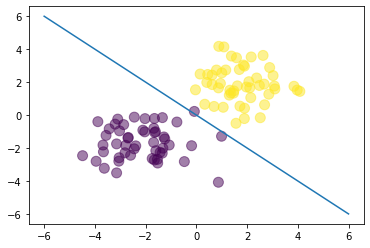

In [213]:
plt.scatter(X[:,0],X[:,1],c=T,s=100,alpha=0.5)
x_axis = np.linspace(-6,6,100)
y_axis = -(w2[0] + x_axis*w2[1]) / w2[2]
plt.plot(x_axis,y_axis)

## Gradient Descent

In [214]:
learningRate = 0.01
for i in range(1000):
    if i % 10 == 0:
        print(str(i) + '   ' + str(crossentropy(T,sigmaz)))
    w += learningRate*Xb.T.dot(T-sigmaz)-0.1*w
    sigmaz = LogisticFunction(Xb.dot(w))
        
   
        

0   257.03691410477035
10   8.232514197440743
20   8.375590808422215
30   8.372111120473205
40   8.370707084199681
50   8.370438383010388
60   8.370390585842006
70   8.370382180837302
80   8.370380705812657
90   8.370380447063702
100   8.370380401680178
110   8.370380393720742
120   8.37038039232489
130   8.370380392080111
140   8.370380392037188
150   8.37038039202966
160   8.370380392028341
170   8.370380392028109
180   8.370380392028066
190   8.370380392028062
200   8.37038039202806
210   8.37038039202806
220   8.37038039202806
230   8.37038039202806
240   8.37038039202806
250   8.37038039202806
260   8.37038039202806
270   8.37038039202806
280   8.37038039202806
290   8.37038039202806
300   8.37038039202806
310   8.37038039202806
320   8.37038039202806
330   8.37038039202806
340   8.37038039202806
350   8.37038039202806
360   8.37038039202806
370   8.37038039202806
380   8.37038039202806
390   8.37038039202806
400   8.37038039202806
410   8.37038039202806
420   8.37038039202806
430

Final w: [0.00273352 0.8579054  0.80865433]


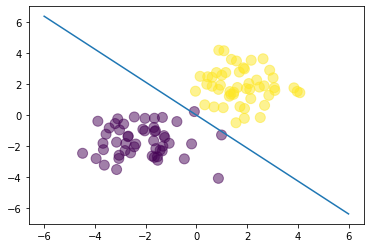

In [215]:
print("Final w:", w)

# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)
plt.show()


### Logistic Train 

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [217]:
X = get_binary_data()

In [218]:
Xtrain,Ytrain,Xtest,Ytest = get_binary_data()

In [219]:
D = Xtrain.shape[1]
W = np.random.randn(D)
b = 0

0 0.7857142462108165 0.7898178731149325
1000 0.19357571481968816 0.15152983318696475
2000 0.19264023557014326 0.1472596128147964
3000 0.19259181376193565 0.14645119282307556
4000 0.19258871137779657 0.14625707685034348
5000 0.1925885028328361 0.1462074479216937
6000 0.19258848864416997 0.14619455016002533
7000 0.19258848767580866 0.1461911839138319
8000 0.19258848760966565 0.14619030436287012
9000 0.19258848760514635 0.1461900744821431
Final train classification_rate: 0.9688473520249221
Final test classification_rate: 0.961038961038961


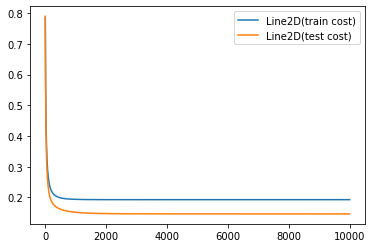

In [220]:
# train loop
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = Forward(Xtrain, W, b)
    pYtest = Forward(Xtest, W, b)

    ctrain = cross_entropyVector(Ytrain, pYtrain)
    ctest = cross_entropyVector(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate*(pYtrain - Ytrain).sum()
    if i % 1000 == 0:
        print(i, ctrain, ctest)

print("Final train classification_rate:", ClassificationRate(Ytrain, np.round(pYtrain)))
print("Final test classification_rate:", ClassificationRate(Ytest, np.round(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()



## Regularization

In [221]:
N = 50
D = 50
X = (np.random.random((N, D)) - 0.5)*10
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))
Y = np.round(LogisticFunction(X.dot(true_w) + np.random.randn(N)*0.5))
costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
learning_rate = 0.001
l1 = 3.0 # try different values - what effect does it have on w?
for t in range(5000):
  # update w
  Yhat = LogisticFunction(X.dot(w))
  delta = Yhat - Y
  w = w - learning_rate*(X.T.dot(delta) + l1*np.sign(w))
  cost = -(Y*np.log(Yhat) + (1-Y)*np.log(1 - Yhat)).mean() + l1*np.abs(w).mean()
  costs.append(cost)


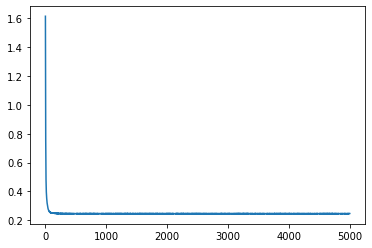

In [222]:
plt.plot(costs)
plt.show()


final w: [ 8.78545434e-01  2.95859840e-01 -2.56872493e-01 -4.27381468e-03
 -1.43220328e-03  8.38929441e-04  9.25855583e-04  2.48149155e-04
  2.51397616e-03  8.56992287e-04 -2.47255108e-03  1.49390945e-01
  1.90100870e-03  3.17421431e-02  1.07440844e-01 -1.63204022e-03
  5.20417986e-04  1.41113109e-04 -2.16237260e-03 -3.55290962e-03
 -1.13837433e-01 -1.07642415e-04 -1.72696570e-03 -1.57633003e-03
  2.19688136e-01 -3.26927498e-03  1.65851519e-03  5.08413627e-03
 -7.67311909e-04  2.76094828e-03  2.27931833e-02 -4.01742258e-03
 -1.00409434e-01 -1.12788225e-03 -1.51126445e-03 -2.76152378e-03
 -1.42584993e-01  4.26558075e-04  5.64739897e-04  1.21820884e-02
 -6.24030625e-02 -2.55833680e-02 -1.16158985e-01 -4.76722591e-03
 -3.10143085e-03  1.42421099e-03  2.79920953e-03 -2.46326310e-03
 -3.25608292e-03 -4.96073980e-03]


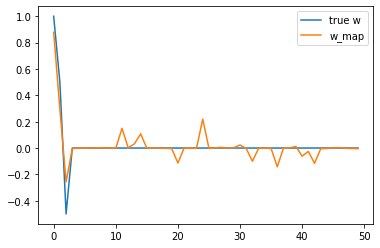

In [223]:
print("final w:", w)

# plot our w vs true w
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()
plt.show()

## Prediction

In [225]:
YhatPred = np.round(Yhat)
Y

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.])

In [226]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature

In [228]:
fpr, tpr, thresholds = roc_curve(Y,Yhat)

In [231]:
roc_auc = auc(fpr, tpr)

In [232]:
roc_auc

1.0

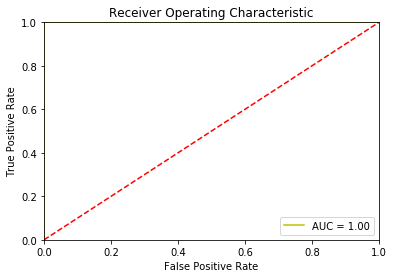

In [233]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [235]:
precision_score(Y,YhatPred)

1.0

In [236]:
f1_score(Y,YhatPred)

1.0

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

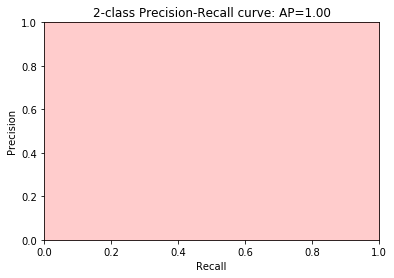

In [237]:
precision, recall, threshold = precision_recall_curve(Y,YhatPred)
average_precision = average_precision_score(Y,YhatPred)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [249]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature

In [250]:
breast_cancer = load_breast_cancer()

In [251]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [252]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [253]:
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)

In [254]:
y

[malignant, malignant, malignant, malignant, malignant, ..., malignant, malignant, malignant, malignant, benign]
Length: 569
Categories (2, object): [malignant, benign]

In [255]:
encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(y))

In [256]:
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int64

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [259]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

/home/gaston/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [261]:
probs = clf.predict_proba(X_test)

In [262]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

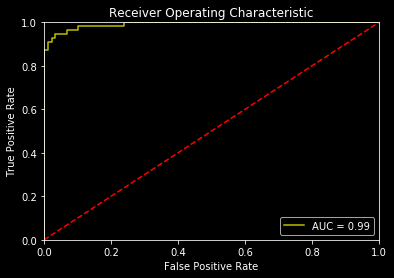

In [263]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [264]:
y_pred = clf.predict(X_test)

In [265]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [266]:
precision_score(y_test, y_pred)

0.9615384615384616

In [267]:
recall_score(y_test, y_pred)

0.9090909090909091

In [268]:
f1_score(y_test, y_pred)

0.9345794392523366

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.91')

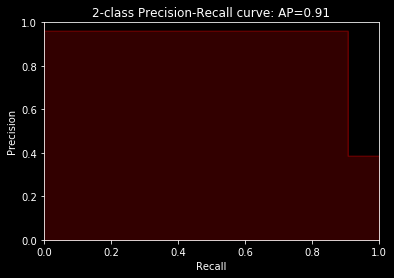

In [269]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))


## estamos

1. Primero init el git
2. Pull los cambios con la flecha para pasar a staged
3. Upload con Pull los cambios
4. Push los cambios
5. Hay que crear la llave


In [1]:
c.LatexConfig.latex_command = 'pdflatex'

NameError: name 'c' is not defined

$$ X2 $$

In [1]:
import numpy as np